# Analyze, identify patterns, and explore the data.

Analyzing data is important because it provides valuable insights and information that can drive decision-making and problem-solving. By analyzing data, patterns, trends, and correlations can be identified, enabling organizations to make informed decisions and predictions. Data analysis helps businesses understand their customers, optimize processes, identify opportunities, detect anomalies, and measure performance. It also supports evidence-based research and helps uncover relationships and causality between variables. Overall, data analysis empowers organizations to gain a competitive edge, improve efficiency, and make data-driven decisions.

## Libraries

In [1]:
# Warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
%matplotlib inline

## Loading data

In [2]:
data = pd.read_csv('../data/cleaned_data.csv')

---

## Project Target (Time_taken)
The time taken by the delivery partner to complete the order

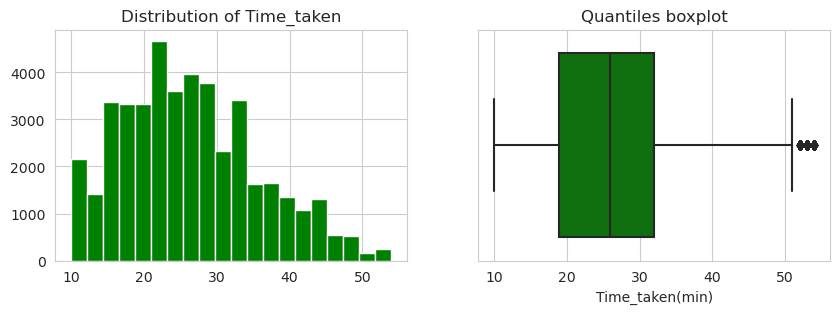

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (10, 3))

sns.distplot(x = data['Time_taken(min)'], bins = 20,
             kde = False, hist_kws = {'alpha': 1}, color = 'green', ax = ax1)
ax1.set_title('Distribution of Time_taken')

sns.boxplot(data = data, x = 'Time_taken(min)', ax = ax2, color = 'green')
ax2.set_title('Quantiles boxplot');

In [25]:
data['Time_taken(min)'].describe().to_frame()[1:]

,Time_taken(min)
mean,26.293831
std,9.373765
min,10.000000
25%,19.000000
50%,26.000000
75%,32.000000
max,54.000000


In [4]:
data['Time_taken(min)'].quantile(0.99), data[data['Time_taken(min)'] > data['Time_taken(min)'].quantile(0.99)].count()[0]

(49.0, 412)

In [5]:
data[data['Time_taken(min)'] > data['Time_taken(min)'].quantile(0.99)][['Weatherconditions', 'Road_traffic_density', 'Time_taken(min)']].mode()

,Weatherconditions,Road_traffic_density,Time_taken(min)
0,Fog,Jam,53.0


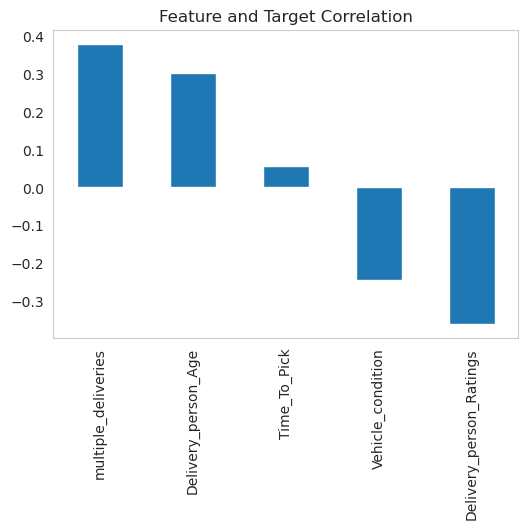

In [15]:
data.drop(['Order_Year', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude'], axis = 1).corr()['Time_taken(min)'].sort_values(ascending = False)[1:].plot(kind = 'bar',
                                                                       title = 'Feature and Target Correlation',
                                                                                                   figsize = (6, 4))

plt.grid(False);